## DAV 6150 Module 4 Assignment
-by Group Manling Yang, Xiaojia He, Qi Sun

***
## Introduction
The purpose of this study is to examine

**Below is a short description of the variables in the data set:**
Attribute: Attribute Range

1. symboling: A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.( -3, -2, -1, 0, 1, 2, 3)
2. normalized_losses: Normalized losses are in use as compared to other cars. It is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/specialty, etc.), and represents the average loss per car per year (continuous from 65 to 256).
3. make: The makers of the brand (alfa_romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo).
4. fuel_type: Types of fuels that cars use (diesel, gas).
5. aspiration: std, turbo.
6. num_of_doors: numbers of doors for each car (four, two).
7. body_style: types of body type for each car (hardtop, wagon, sedan, hatchback, convertible).
8. drive_wheels: numbers of wheels for each car (4wd, fwd, rwd).
9. engine_location: locations of cars' location (front, rear).
10. wheel_base:the distance between the centers of the front and rear wheels (continuous from 86.6 120.9).
11. length: length of cars (continuous from 141.1 to 208.1).
12. width: width of cars (continuous from 60.3 to 72.3).
13. height: height of cars (continuous from 47.8 to 59.8).
14. curb_weight: the weight of an automobile without occupants or baggage (continuous from 1488 to 4066).
15. engine_type: types of engine (dohc, dohcv, l, ohc, ohcf, ohcv, rotor).
16. num_of_cylinders: numbers of cylinders (eight, five, four, six, three, twelve, two).
17. engine_size: size of engine (continuous from 61 to 326).
18. fuel_system: fuels system that cars use (1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi).
19. bore: size of cylinder for each car (continuous from 2.54 to 3.94).
20. stroke: the distance travelled by the piston in each cycle (continuous from 2.07 to 4.17).
21. compression_ratio: the ratio of the maximum to minimum volume in the cylinder of an internal combustion engine (continuous from 7 to 23).
22. horsepower: powers of each car (continuous from 48 to 288).
23. peak_rpm: The maximum revolutions per Minute continuous (from 4150 to 6600).
24. city_mpg: numbers of miles your car can travel on a single gallon of gascontinuous when driving with occasional stopping and braking, simulating the conditions you're likely to run into while driving on city streets (from 13 to 49).
25. highway_mpg: numbers of miles your car can travel on a single gallon of gascontinuous when people drive more continuous acceleration (continuous from 16 to 54).
26. price: This is our target value. This means “price” is the value that we want to predict from the data-set, and the predictors should be all the other variables listed, like “symboling”, “normalized-losses”, “make” and so on.(continuous from 5118 to 45400).

**Procedures:**

Here are main procedures of this project:

Step 1: Load data into the data frame from GitHub

Step 2: Exploratory Data Analysis

Step 3: Create linear regression model

Step 4: Re-run Exploratory Data Analysis and do comparisons

Step 5: Conclusion

>For **Step 2**, the main components of EDA include:
1. Exchange string data to numerical data
2. Data Description
3. Check the missing and null values
4. Iterative Imputation for Missing Values of numerical variables
5. Create boxplot to detect Outliers
6. Check distribution
7. Analyze relationships between variables

In [38]:
# Importing required libraries.

import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

import missingno as msno 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


***
### Step 1: Load data into the data frame from GitHub

`.head()` returns the first 5 rows of the dataset. 

In [39]:
# read the dataset from Github 
df = pd.read_csv('https://raw.githubusercontent.com/mandy941/DAV-Data-Science/master/Feature%20Selection%20%26%20Dimensionality%20Reduction-w3/M4_Data.csv')
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


After reading the dataset from Github, we find that there are no columns' names. So, we give the names for each columns base on the information from https://archive.ics.uci.edu/ml/datasets/Automobile.

In [40]:
# read the dataset from Github and give names for each columns
df = pd.read_csv('https://raw.githubusercontent.com/mandy941/DAV-Data-Science/master/Feature%20Selection%20%26%20Dimensionality%20Reduction-w3/M4_Data.csv',
                names=['symboling','normalized_losses','make','fuel_type','aspiratio','num_of_doors','body_style','drive_wheels','engine_location',
             'wheel_base','length','width','high','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke',
             'compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price'])
df.head()

,symboling,normalized_losses,make,fuel_type,aspiratio,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


***
### Step 2: Exploratory Data Analysis

In this case, the steps of Exploratory Data Analysis consist of:
>1. Exchange string data to numerical data
2. Data Description
3. Check the missing and null values
4. Iterative Imputation for Missing Values of numerical variables
5. Create boxplot to detect Outliers
6. Check distribution
7. Analyze relationships between variables


#### 1. Exchange string data to numerical data
 In the dataframe, we find that num_of_doors and num_of_cylinders should be numerical data. Therefore, we use `.replace()` to exchange them.
According to attributes' range, the minimum of all numerical variables are more than 0,except symboling variable. However, the symboling column does not contain missing values. So, we can use 0 to replace the symbol '?' to represent the missing values.
 

In [41]:
# use reppace functions exchange letter to number
df1 = df.replace('four',4).replace('two',2)
df2 = df1.replace('eight',8).replace('five',5).replace('six',6).replace('three',3).replace('twelve',12)
df3 = df2.replace('?',np.nan)
df3

,symboling,normalized_losses,make,fuel_type,aspiratio,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,4.0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4.0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,4.0,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


make fuel_type aspiratio body_style drive_wheels engine_location engine_type fuel_system

***
#### 2. Data description:
`.shape` returns the number of rows by the number of columns for the dataset. My output was (12795, 16), meaning the dataset has 12795 rows and 16 columns.

`.info()` returns information about a DataFrame including column names, data types, non-null values and memory usage.

`.nunique(axis=0)` returns the number of unique values for each variable.

`.describe()` summarizes the count, mean, standard deviation, min, and max for numeric variables. 

`.isnull().sum()` returns the columns and the number of missing values.


In [42]:
# check information for the dataframe
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    164 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiratio            205 non-null object
num_of_doors         203 non-null float64
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
high                 205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null int64
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression_ratio    205 non-null float64
horsepower           203 non-nul

In [43]:
# check the shape for the dataframe
df3.shape

(205, 26)

In [44]:
# check the number of unique values per variable
df3.nunique(axis=0)

symboling              6
normalized_losses     51
make                  22
fuel_type              2
aspiratio              2
num_of_doors           2
body_style             5
drive_wheels           3
engine_location        2
wheel_base            53
length                75
width                 44
high                  49
curb_weight          171
engine_type            7
num_of_cylinders       7
engine_size           44
fuel_system            8
bore                  38
stroke                36
compression_ratio     32
horsepower            59
peak_rpm              23
city_mpg              29
highway_mpg           30
price                186
dtype: int64

In [45]:
# statistical summary of numeric variables:
df3.describe()

,symboling,num_of_doors,wheel_base,length,width,high,curb_weight,num_of_cylinders,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,203.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,3.123153,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,10.142537,25.219512,30.751220
std,1.245307,0.994841,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,3.972040,6.542142,6.886443
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,23.000000,49.000000,54.000000


#### Findings:

>1. The dataset consists of 26 variables and 205 observations.
2. Missing values: some variables contain missing values, we'll discuss how to handle the missing values later.
3. The types of data are object, integer, and float, so we don't need to make any change to the data type.
4. There is one variable has negative values, which are symboling. 
5. The symbol "?" represent the missing data in the dataframe, we will exchange it to be 0 
6. The minimum of all numerical variables are more than 0,except symboling variable.


#### 3. Check the missing and null values.

In [46]:
# check the numbers of completed rows without missing values
df.shape[0] - df.isnull().sum(axis=0).shape[0]

179

In [47]:
# percentage of colimns with missing values with symbol '?’.
miss = df3.isnull().sum(axis=0)/len(df)
# show the percentage of missing values for specific columns that contains missing values
miss[miss>0]

normalized_losses    0.200000
num_of_doors         0.009756
bore                 0.019512
stroke               0.019512
horsepower           0.009756
peak_rpm             0.009756
price                0.019512
dtype: float64

Text(0.5, 1.0, ' Percents of nonmissing data with missingno.')

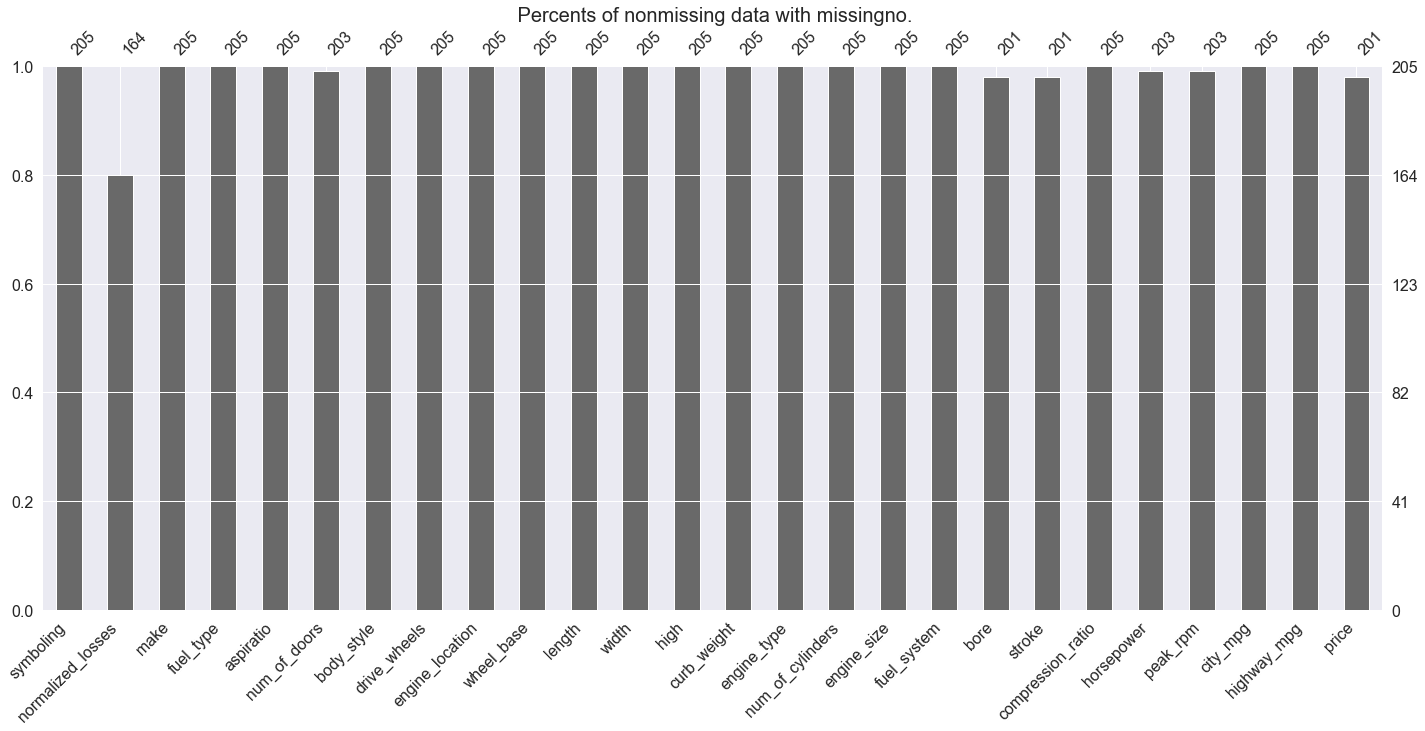

In [48]:
# create the bar charts to show percents of nonmissing databy missingo function
msno.bar(df3)
plt.title(' Percents of nonmissing data with missingno.',fontsize=20)

#### Findings:

>1. There are 7 numerical variables have missing values, including normalized_losses, num_of_doors, bore, storke, horsepower, peak_rpm, price.
2. normalized_losses,bore, storke, and price variables have approximately 20% missing values.
3. The categorical variables do not have any missing data, we do not need to fill them.
4. There are 179 completed rows which are without any missing values



***
#### 4. Iterative Imputation for Missing Values of numerical variables - `IterativeImputer()`


We need to impute missing values from other numeric values. We'll use `IterativeImputer()`, which is a multivariate imputer that estimates each feature from all the others.
Also, the `IterativeImputer()` supports inductive mode. To use it we need to add a special experimental import. 


In [49]:
df4 = df3[['symboling','num_of_doors','wheel_base','length','width','high','curb_weight','num_of_cylinders','engine_size','compression_ratio',
          'city_mpg','highway_mpg']]

In [50]:
# import IterativeImputer and enable_iterative_imputer from sklearn library
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# impute missing values
imp = IterativeImputer()
imp.fit(df4.isnull())
df5 = imp.transform(df4)
df5 = pd.DataFrame(df5, columns=df4.columns)
df5

,symboling,num_of_doors,wheel_base,length,width,high,curb_weight,num_of_cylinders,engine_size,compression_ratio,city_mpg,highway_mpg
0,3.0,2.0,88.6,168.8,64.1,48.8,2548.0,4.0,130.0,9.0,21.0,27.0
1,3.0,2.0,88.6,168.8,64.1,48.8,2548.0,4.0,130.0,9.0,21.0,27.0
2,1.0,2.0,94.5,171.2,65.5,52.4,2823.0,6.0,152.0,9.0,19.0,26.0
3,2.0,4.0,99.8,176.6,66.2,54.3,2337.0,4.0,109.0,10.0,24.0,30.0
4,2.0,4.0,99.4,176.6,66.4,54.3,2824.0,5.0,136.0,8.0,18.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,4.0,109.1,188.8,68.9,55.5,2952.0,4.0,141.0,9.5,23.0,28.0
201,-1.0,4.0,109.1,188.8,68.8,55.5,3049.0,4.0,141.0,8.7,19.0,25.0
202,-1.0,4.0,109.1,188.8,68.9,55.5,3012.0,6.0,173.0,8.8,18.0,23.0
203,-1.0,4.0,109.1,188.8,68.9,55.5,3217.0,6.0,145.0,23.0,26.0,27.0


In [51]:
# check the missing data after imputation
df5.isnull().sum()

symboling            0
num_of_doors         0
wheel_base           0
length               0
width                0
high                 0
curb_weight          0
num_of_cylinders     0
engine_size          0
compression_ratio    0
city_mpg             0
highway_mpg          0
dtype: int64

In [52]:
# check the group for num)of_doors column
df5.groupby(['num_of_doors']).count()

,symboling,wheel_base,length,width,high,curb_weight,num_of_cylinders,engine_size,compression_ratio,city_mpg,highway_mpg
num_of_doors,,,,,,,,,,,
0.009756,2,2,2,2,2,2,2,2,2,2,2
2.000000,89,89,89,89,89,89,89,89,89,89,89
4.000000,114,114,114,114,114,114,114,114,114,114,114


#### 5. Create boxplot to detect Outliers

We'll use `sns.boxplot` to discover outliers. If there is an outlier it will plot as a point in boxplot but other populations will be grouped together and display as boxes. 
 
Shown below is the box plots of all features.

In [53]:
# calculate the IQR for each attributes without any missing values
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

symboling              2.0
wheel_base             7.9
length                16.8
width                  2.8
high                   3.5
curb_weight          790.0
engine_size           44.0
compression_ratio      0.8
city_mpg              11.0
highway_mpg            9.0
dtype: float64


In [54]:
# use skew function to Identify Outliers by Skewness values
df5.skew()

symboling            0.211072
num_of_doors        -0.398559
wheel_base           1.050214
length               0.155954
width                0.904003
high                 0.063123
curb_weight          0.681398
num_of_cylinders     2.817459
engine_size          1.947655
compression_ratio    2.610862
city_mpg             0.663704
highway_mpg          0.539997
dtype: float64

In [55]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
symboling            205 non-null float64
num_of_doors         205 non-null float64
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
high                 205 non-null float64
curb_weight          205 non-null float64
num_of_cylinders     205 non-null float64
engine_size          205 non-null float64
compression_ratio    205 non-null float64
city_mpg             205 non-null float64
highway_mpg          205 non-null float64
dtypes: float64(12)
memory usage: 19.3 KB


#### 6. Check distribution
We'll check the distribution of the data — Whether the data is normally distributed or if it’s skewed (to the left or right).

 We'll use `hist()` to check the distributio of 10 continuous variables that include city_mpg, compression_ratio, curb_weight, engine_size, high, highway_mpg, length, symboling, wheel_base, width.


C:\Users\13750\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\13750\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\13750\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\13750\Anaconda3\lib\site-packages\pandas\plotting\_matpl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C72B51DCF8>,
      dtype=object)

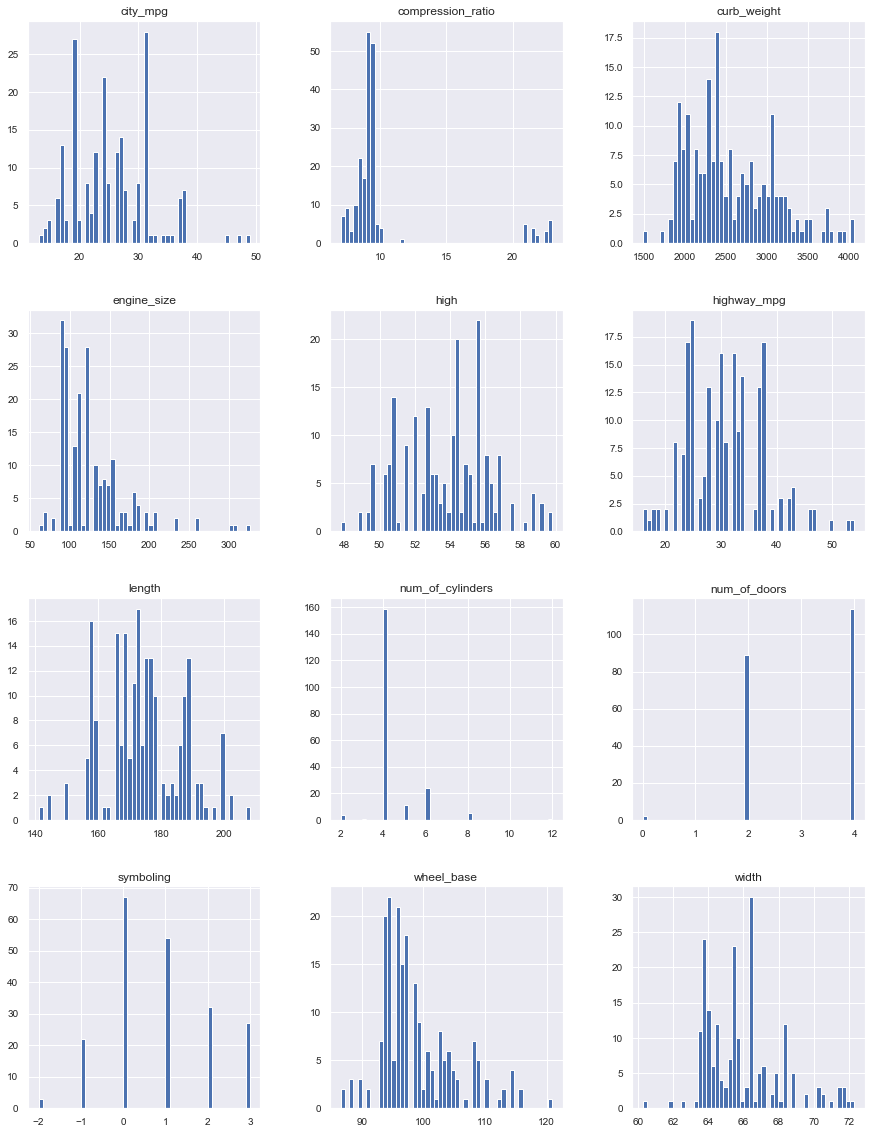

In [56]:
# create histogram for each columns of dataframe
df5.hist(figsize=(15, 20), bins=50, xlabelsize=10, ylabelsize=10)

#### Findings:
>1. From the histograms above, most variables are normal distribution.
2. 

***
####  6. Analyze relationships between variables

Correlation is a measurement that describes the relationship between two variables.

Correlation matrix is a table that shows the Pearson correlation coefficients (Pearson's r) between many variables. We'll use `sns.heatmap()` to plot a correlation matrix of all of the variables in the dataset. Then, we'll use `.corr()` to double check the Pearson's r value.

Text(0.5, 1.0, 'Figure 6: Correlations')

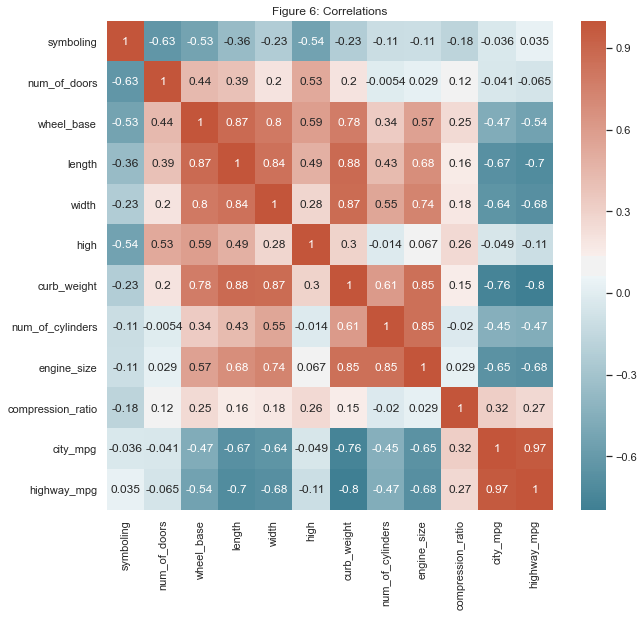

In [57]:
# Finding the correlation bewteen the Features.
plt.figure(figsize=(10,9))

corr = df5.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title('Figure 6: Correlations')

In [58]:
# show the number of correlation for each attributes with TARGET
corr = df5.corr()
print (corr['city_mpg'].sort_values(ascending=False), '\n')

city_mpg             1.000000
highway_mpg          0.971337
compression_ratio    0.324701
symboling           -0.035823
num_of_doors        -0.041266
high                -0.048640
num_of_cylinders    -0.445837
wheel_base          -0.470414
width               -0.642704
engine_size         -0.653658
length              -0.670909
curb_weight         -0.757414
Name: city_mpg, dtype: float64 



#### Findings:
>1. There is a strong multicollinearities between any two independent variables and city_mpg, except symbling and compression_rati.
2. The independent variables with the highest 3 correlation coefficient r are highway_mpg(r= 0.971337), curb_weight(r=-0.757414), and length (r=-0.670909). All other r values are between +0.98 and –0.76, which have very strong correlations with city_mpg. 